# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

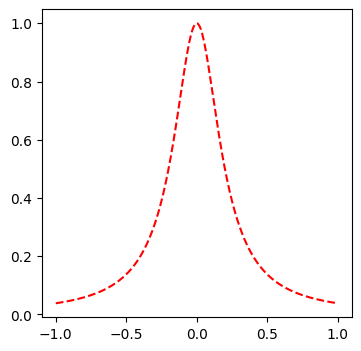

In [ ]:
f = lambda x: 1 / (1 + 25*x**2)

x = np.linspace(-1,1, 1000)
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(x, f(x), 'r--')
plt.show()

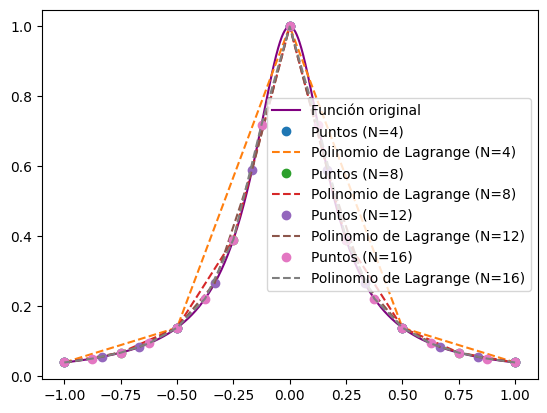

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

f = lambda x: 1 / (1 + 25*x**2)

x = np.linspace(-1,1, 1000)

plt.figure()
plt.plot(x, f(x), 'purple', label="Función original")

for i in range(4, 20, 4):
  N = i
  n = N + 1
  x_ = np.linspace(-1, 1, n)
  xL = np.linspace(-1, 1, n)

  PL = lagrange(xL, f(xL))
  plt.plot(x_, f(x_), 'o', label=f"Puntos (N={N})")
  plt.plot(xL, PL(xL), '--', label=f"Polinomio de Lagrange (N={N})")

plt.legend()
plt.show()



# 2.
Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [ ]:
import sympy as sp
sp.init_printing()

f_s = lambda y: 1 / (1+25*y**2)

y = sp.symbols('y')
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

In [ ]:
n_ = 4
df5 = sp.diff(f_s(y), y,n_ + 1 ) # derivada de orden 5 (n+1)
f5 = sp.lambdify(y, df5, 'numpy')
f5(2)

-0.20491603468558328

-0.04504504504504503

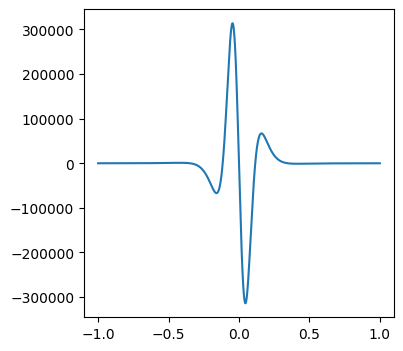

In [ ]:
x5 = np.linspace(-1,1, 1000)
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(x5, f5(x5))
plt.plot()

x_max = np.max(abs(f5(x5)))
x_zeta = np.argmax(abs(f5(x5)))
x5[x_zeta]

[]

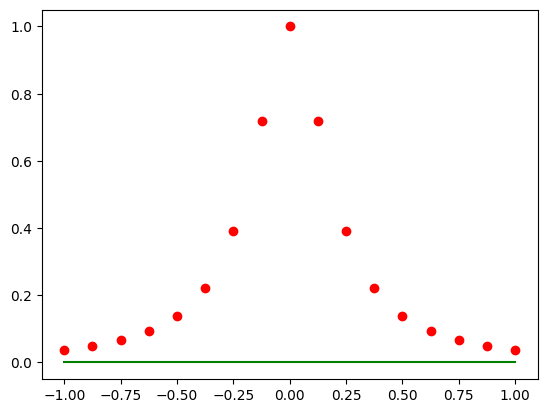

In [ ]:
import math as mt
plt.plot(x_, f(x_), 'ro')
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]), 'g-')
plt.plot()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Tambien encontrar para la función de error:

La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

# recordar hacer todo el procedimiento anterior con cubicSpline

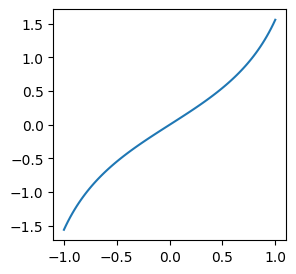

In [ ]:
x = np.linspace(-1, 1, 100)
f = lambda x: np.tan(x)

fig, ax = plt.subplots(figsize = (3,3))
plt.plot(x, f(x))
plt.show()

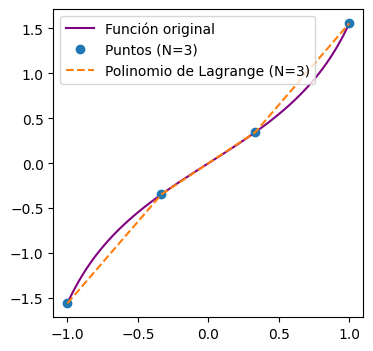

In [ ]:
N = 3
n = N + 1
x_ = np.linspace(-1, 1, n)
xL = np.linspace(-1, 1, n)

PL = lagrange(xL, f(xL))
fig, ax = plt.subplots(figsize = (4,4))

plt.plot(x, f(x), 'purple', label="Función original")
plt.plot(x_, f(x_), 'o', label=f"Puntos (N={N})")
plt.plot(xL, PL(xL), '--', label=f"Polinomio de Lagrange (N={N})")
plt.legend()
plt.show()

In [ ]:
import sympy as sp
sp.init_printing()

F = lambda z: sp.tan(z)

z = sp.symbols('z')
F(z)

tan(z)

In [ ]:
n_ = 3
Df5 = sp.diff(F(z), z, n_ + 1) # derivada de orden 5 (n_+1)
F5 = sp.lambdify(z, Df5, 'numpy')

F5(0)

0.0

-1.0

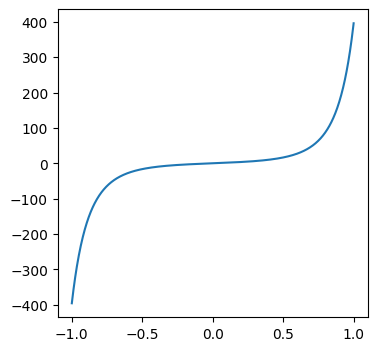

In [ ]:
x5 = np.linspace(-1,1, 1000)
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(x5, F5(x5))
plt.plot()

x_max = np.max(abs(F5(x5)))
x_zeta = np.argmax(abs(F5(x5)))
x5[x_zeta]

[]

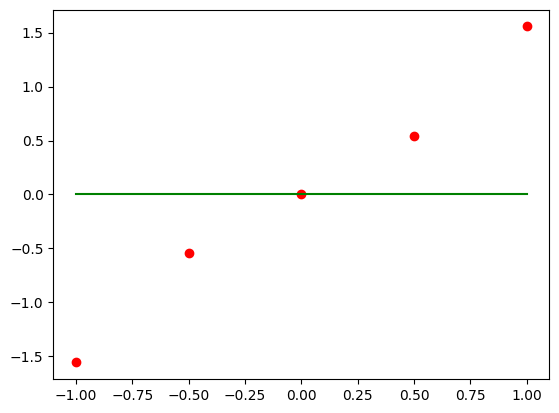

In [ ]:
import math as mt
n= 5
x_ = np.linspace(-1,1,n)
xL =  np.linspace(-1,1,n)

plt.plot(x_, f(x_), 'ro')
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]), 'g-')
plt.plot()

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [ ]:
import pandas as pd
new_x_range = np.linspace(1.1, 2.1, 5)
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
data = {'X': x, 'Y': fx, 'new_x': new_x_range}
df = pd.DataFrame(data)
df

,X,Y,new_x
0,1.0,0.765198,1.10
1,1.3,0.620086,1.35
2,1.6,0.455402,1.60
3,1.9,0.281819,1.85
4,2.2,0.110362,2.10


In [ ]:
pol_la = lagrange(df['new_x'], df['Y'])

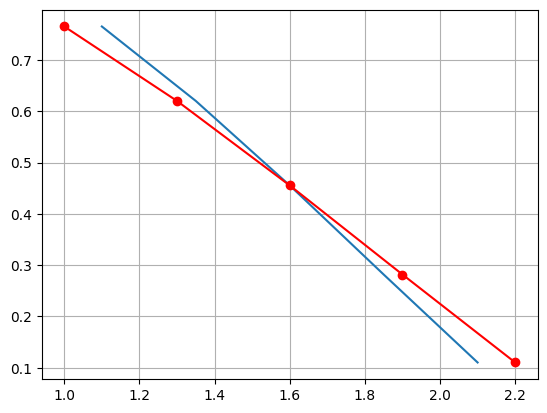

In [ ]:
plt.plot(df['new_x'],pol_la(df['new_x']))
plt.plot(df['X'], df['Y'], 'ro-') # grafica original
plt.grid()

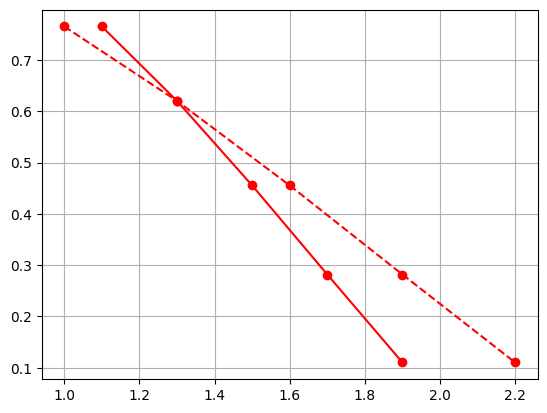

In [ ]:
# ================================================

# METODO DE SPLINE CUBICS

from scipy.interpolate import CubicSpline

new_x_range = new_x_range = np.arange(1.1, 2.1, 0.2)
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

cs = CubicSpline(new_x_range, fx)
c_s = CubicSpline(x, fx)

plt.plot(new_x_range, cs(new_x_range), 'ro-')
#plt.plot(new_x_range, c_s(x))
plt.plot(x, fx, 'ro--')
plt.grid()

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

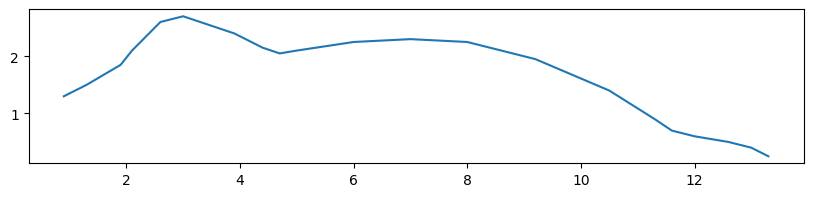

In [ ]:
x = np.array([0.9,1.3,1.9,2.1,2.6,3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0,8.0, 9.2, 10.5, 11.3,11.6,12.0,12.6,13.0,13.3])
y = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

fig, axis = plt.subplots(figsize=(10,2))
plt.plot(x, y)

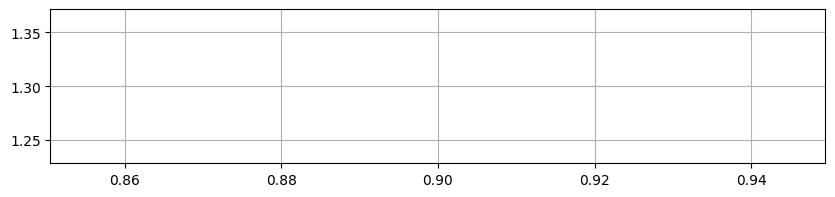

In [ ]:
PL = lagrange(x,y)

x_ = np.arange(x.min(), x.max(), len(x))

fig, axis = plt.subplots(figsize=(10,2))
plt.plot(x_, PL(x_))

plt.grid()

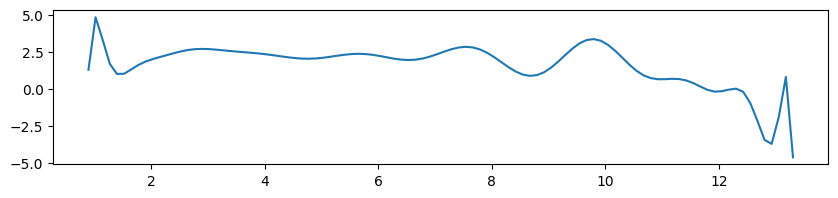

In [ ]:
import numpy as np
from scipy.interpolate import lagrange

# Arrays originales
x = np.array([0.9,1.3,1.9,2.1,2.6,3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0,8.0, 9.2, 10.5, 11.3,11.6,12.0,12.6,13.0,13.3])
y = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

# Interpolar con Lagrange
poly = lagrange(x, y)

# Crear un nuevo conjunto de puntos x para la interpolación
x_new = np.linspace(x.min(), x.max(), 100)

fig, axis = plt.subplots(figsize=(10,2))

# Evaluar el polinomio en los nuevos puntos x
y_interp = poly(x_new)

plt.plot(x_new, poly(x_new))


In [ ]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato